# Tarea 2 - Alexandre Poupeau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# defining some hyperparameters
percent_train = 0.75

# figure size
plt.rcParams['figure.figsize'] = (10, 5)

# import data to handle it easily after
data = np.genfromtxt(fname="https://raw.githubusercontent.com/GAMES-UChile/Curso-Aprendizaje-de-Maquinas/master/datos/datosT2.txt")
length_data = data.shape[0]

## Exercice 1 - No Lineal Regression

### 1) Import data

We are going to take a look at data from a airline company. The dataset represents the number of passengers at a function of time. We are going to divide the dataset into two parts : the first years to train the model and the rest to evaluate or test the model.

In [3]:
# dividing the dataset into two parts train and test
idx_train_test_sep = int(length_data*percent_train)

X_train = data[:idx_train_test_sep, 0]
Y_train = data[:idx_train_test_sep, 1]

X_test = data[idx_train_test_sep:, 0]
Y_test = data[idx_train_test_sep:, 1]

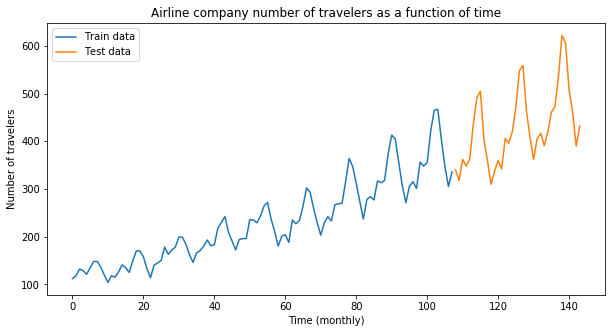

In [4]:
# plot data train/test
plt.plot(X_train, Y_train, label="Train data")
plt.plot(X_test, Y_test, label="Test data")
plt.title("Airline company number of travelers as a function of time")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of travelers")
plt.legend()
plt.show()

What we can see is that there is a fluctuation each year due to, I suppose, the different seasons (especially winter and summer). Overall, the number of passengers increases with time (we can suppose the company gets more and more well-known and approved by people) and the fluctuation also increases with time. 

### 2) Polynomial model

We are going to try to find a model to fit the data using a polynomial base. Here is how we construct the model :

$y=f_{\theta}(x) + \eta$

We suppose that $\eta$ describes noise and therefore can be represented as following a Gaussian distribution centered in zero : $\eta \sim \mathcal{N}(0, \sigma^2_{\eta})$.

Thus, we need to find the optimal $\theta^{\prime} = [\theta, \sigma^2_{\eta}]$ where $\theta$ describes the parameters of the polynomial function $f_{\theta}$.

In [5]:
def polyBaseMatrix(X, degree):
    """
        Compute the polynomial base matrix \Phi(X) given the input 
        X = [x_1, ..., x_n].
        
        Arguments:
            X (array) : input data
            degree (int) : degree of the polynomial base
            
        Returns:
            phi_d_X (array) : matrix of shape (len(X), degree+1)  
    """
    length = len(X)
    phi_d_X = np.ones(shape=length)
    for d in range(1, degree+1):
        phi_d_X = np.vstack((phi_d_X, X**d))
    return phi_d_X.T

In [7]:
def optimizerPolyMAP(X, Y, degree, rho=1):
    """
        Compute the optimal parameters for a polynomial model.
        Warning : assert(len(X)==len(Y)) and degree >= 0.
        
        Arguments:
            X (array) : input data used to fit the model
            Y (array) : ouput data used to fit the model 
            degree (int) : defines the degree of the polynomial model
        
        Returns:
            opt_params (array) : the optimal parameters for the 
                polynomial model
    """
    phi_d_X = polyBaseMatrix(X, degree)
    mat_to_inv = np.matmul(phi_d_X.T, phi_d_X) + rho*np.identity(degree+1)
    inverse_part = np.linalg.inv(mat_to_inv)
    opt_params = np.matmul(np.matmul(inverse_part, phi_d_X.T), Y)
    return opt_params

1215.5151983245296 4562.736848521016
0.0 11.0


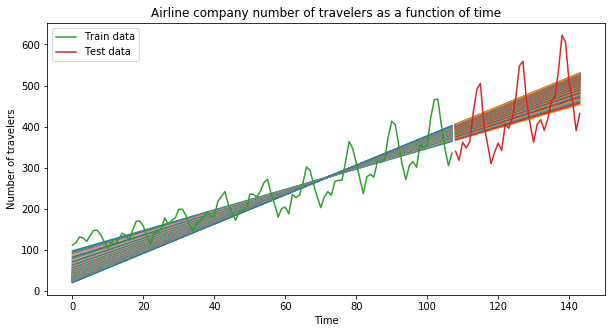


1110.243958572215 4536.571045032757
0.0 5.0


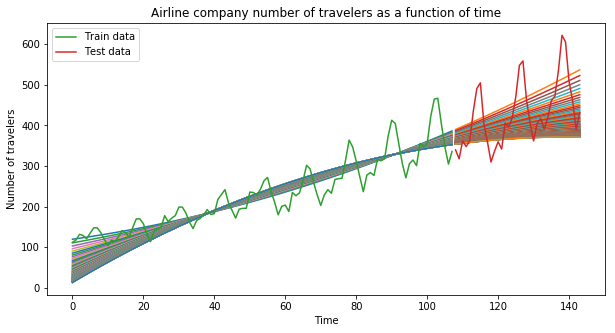


1108.97110657808 6626.679868644522
0.0 0.0


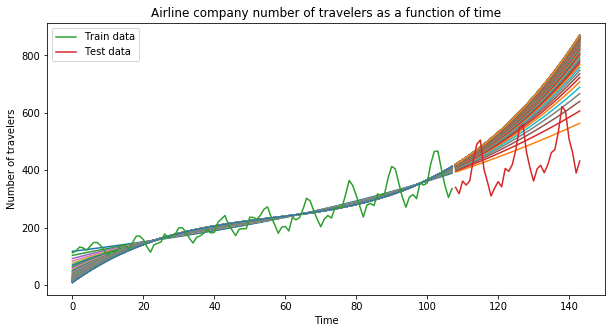


1108.3808294173639 5054.938501482746
0.0 0.0


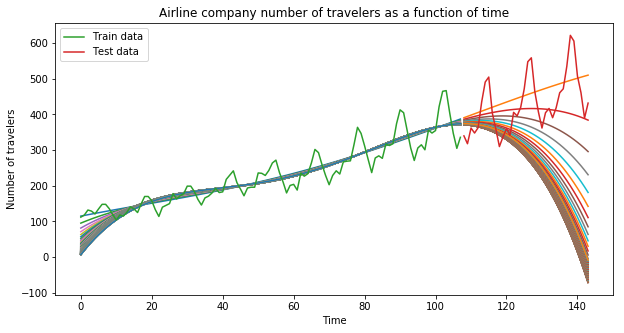

In [9]:
degree_values = np.linspace(1, 4, 4)
rho_values = np.linspace(0, 100, 101)

for d in degree_values:
    test_MSEs = list()
    train_MSEs = list()
    for rho in rho_values:
        opt_params = optimizerPolyMAP(X=X_train, Y=Y_train, degree=int(d), rho=rho)

        phi_d_X_train =  polyBaseMatrix(X=X_train, degree=int(d))
        phi_d_X_test = polyBaseMatrix(X=X_test, degree=int(d))

        Y_pred_train = np.matmul(opt_params, phi_d_X_train.T)
        Y_pred_test = np.matmul(opt_params, phi_d_X_test.T)
        
        train_MSE = np.mean((Y_train - Y_pred_train)**2)
        test_MSE = np.mean((Y_test - Y_pred_test)**2)
        train_MSEs.append(train_MSE)
        test_MSEs.append(test_MSE)
        
        # display predictions
        plt.plot(X_train, Y_pred_train)
        plt.plot(X_test, Y_pred_test)
    
    best_test_MSE = np.min(test_MSEs)
    best_rho_test = rho_values[np.argmin(test_MSEs)]
    best_train_MSE = np.min(train_MSEs)
    best_rho_train = rho_values[np.argmin(train_MSEs)]
    print(best_train_MSE, best_test_MSE)
    print(best_rho_train, best_rho_test)

    # display real values
    plt.plot(X_train, Y_train, label="Train data")
    plt.plot(X_test, Y_test, label="Test data")
    plt.title("Airline company number of travelers as a function of time")
    plt.xlabel("Time")
    plt.ylabel("Number of travelers")
    plt.legend()
    plt.show()
    
    print()